In [1]:
suppressPackageStartupMessages(library("ggplot2"))
suppressPackageStartupMessages(library("reshape2"))
suppressPackageStartupMessages(library("dplyr"))

In [3]:
# https://iopscience.iop.org/article/10.1088/2515-7620/ab5e1e?gridset=show
production_required_kw_per_1kwh_battery = 50

#https://www.volker-quaschning.de/datserv/CO2-spez/index_e.php
co2gram_per_kwh_lignite = 814
co2gram_per_kwh_gas = 433
# https://www.nowtricity.com/country/germany/
co2gram_per_kwh_germany = 355
co2gram_per_kwh = co2gram_per_kwh_germany

# Heidelberg prices (13 September 2022)
price_tesla = 50e3-7.5e3
price_conventional = 18e3
price_kw = 0.32
price_petrol = 1.9

# Tesla Model 3 2021 (standard range)
# https://en.wikipedia.org/wiki/Tesla_Model_3
tesla_battery_kwh = 57.5
tesla_range_km = 491
# In city tesla_km_per_kwh = 100/24
tesla_km_per_kwh = 100/15
tesla_co2_per_km = co2gram_per_kwh/tesla_km_per_kwh
tesla_battery_co2gram = tesla_battery_kwh*production_required_kw_per_1kwh_battery*co2gram_per_kwh
tesla_euro_per_km = price_kw / tesla_km_per_kwh

# Ford Fiesta
conventional_co2_per_liter = 2.37*1000
conventional_km_per_liter = 1/(5/100)
conventional_co2_per_km = conventional_co2_per_liter/conventional_km_per_liter
conventional_euro_per_km = price_petrol/conventional_km_per_liter

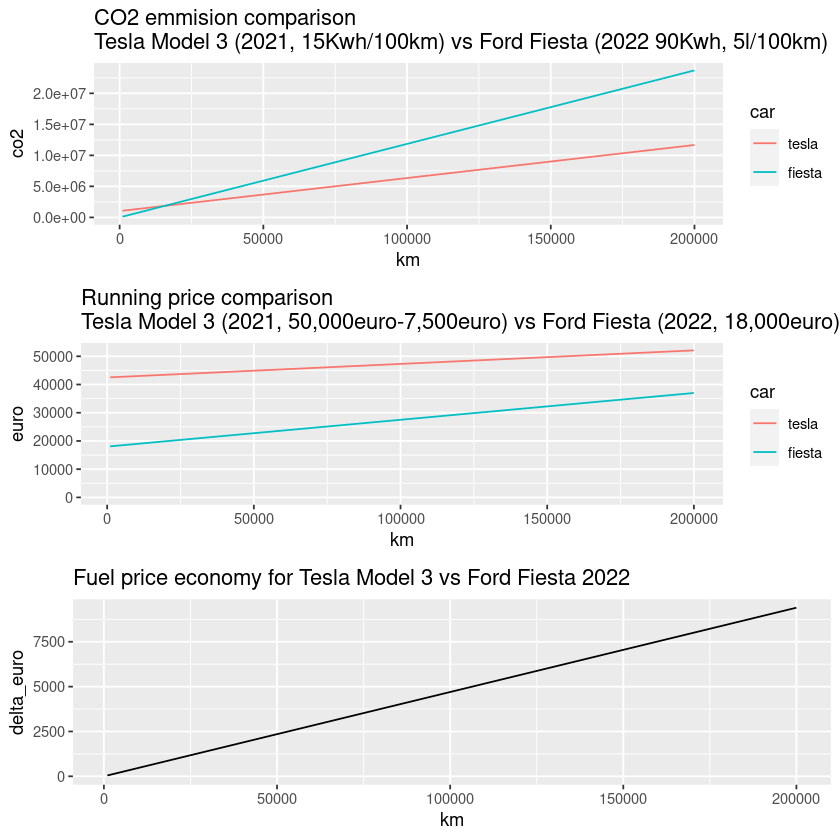

In [4]:
co2_ggplot = data.frame(km=seq(1e3, 200e3, 1e3)) %>%
  dplyr::mutate(tesla=tesla_battery_co2gram+tesla_co2_per_km*km, fiesta=conventional_co2_per_km*km) %>%
  reshape2::melt(measure.vars=c("tesla", "fiesta"), value.name="co2", variable.name="car")
price_ggplot = data.frame(km=seq(1e3, 200e3, 1e3)) %>%
  dplyr::mutate(tesla=price_tesla+km*tesla_euro_per_km, fiesta=price_conventional+km*conventional_euro_per_km, delta_euro=km*conventional_euro_per_km-km*tesla_euro_per_km) %>%
  reshape2::melt(measure.vars=c("tesla", "fiesta"), value.name="euro", variable.name="car")

gridExtra::grid.arrange(
    ggplot(co2_ggplot) +
      labs(title="CO2 emmision comparison\nTesla Model 3 (2021, 15Kwh/100km) vs Ford Fiesta (2022 90Kwh, 5l/100km)") +
      geom_line(aes(x=km, y=co2, color=car)) +
      coord_cartesian(ylim=c(0, max(co2_ggplot$co2))),
    ggplot(price_ggplot) +
      labs(title="Running price comparison\nTesla Model 3 (2021, 50,000euro-7,500euro) vs Ford Fiesta (2022, 18,000euro)") +
      geom_line(aes(x=km, y=euro, color=car)) +
      coord_cartesian(ylim=c(0, max(price_ggplot$euro))),
    ggplot(price_ggplot) +
      labs(title="Fuel price economy for Tesla Model 3 vs Ford Fiesta 2022") +
      geom_line(aes(x=km, y=delta_euro)) +
      coord_cartesian(ylim=c(0, max(price_ggplot$delta_euro)))
)